


# 1. Collecte de données

In [ ]:
#importer les bibliotheques requests et beautifulsoup pour Le scraping
import requests
from bs4 import BeautifulSoup

#on effectue le scraping les commentaires et leurs votes
def get_comments_and_upvotes_from_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        #extraction des commentaires et les votes
        section_comments = soup.find_all(class_='comments')
        liste_comments = []

        for section in section_comments:
            commentaires = section.find_all('p')  #les commentaires sont dans des balises <p>
            for commentaire in commentaires:
                # Extraire le nombre de votes
                span_votes = commentaire.find_next('span', class_='comment-recat-number')
                if span_votes:
                    # Analyser le nombre de votes postifs
                    votes_positifs = int(span_votes.get_text(strip=True))
                else:
                    votes_positifs = 0  # Valeur par défaut si le nombre de votes n'est pas trouvé
                # Ajouter le texte du commentaire et les votes à la liste
                liste_comments.append({
                    'comment': commentaire.get_text(strip=True),
                    'upvotes': votes_positifs
                })

        # Trier les commentaires par votes  en ordre décroissant
        liste_comments.sort(key=lambda x: x['upvotes'], reverse=True)

        return liste_comments
    else:
        print(f"Échec de la récupération de la page. Code d'état : {response.status_code}")
        return []

#article sur Hespress
url = 'https://www.hespress.com/%d8%a8%d8%a7%d9%8a%d8%aa%d8%a7%d8%b3-%d8%a7%d9%84%d8%af%d8%b9%d9%85-%d8%a7%d9%84%d8%a7%d8%ac%d8%aa%d9%85%d8%a7%d8%b9%d9%8a-%d9%8a%d8%b5%d9%88%d9%86-%d9%83%d8%b1%d8%a7%d9%85%d8%a9-%d8%a7%d9%84%d9%81-1371171.html'
commentaires = get_comments_and_upvotes_from_page(url)

# Afficher les commentaires extraits triés par votes
for i, comment_data in enumerate(commentaires, 1):
    print(f"Commentaire {i} : {comment_data['comment']} (Votes positifs : {comment_data['upvotes']})")

# importer pandas et créer un DataFrame pour stocker les commentaires leurs votes
import pandas as pd
df = pd.DataFrame(commentaires)
df.head()

Commentaire 1 : ذكرتني بوزيرة حينما قالت إن من له مدخول 20 درهم في اليوم فهو ليس بفقير ما مجموعه 600 درهم في الشهر انتم الفقراء ونحن الأغنياء . (Votes positifs : 231)
Commentaire 2 : نعم داشي لي غادي ياخدوه فالدعم غادي يخسروه فالبوطة شكرا للنظرة الثاقبة ديالكم (Votes positifs : 208)
Commentaire 3 : عطيتوا للناس دعم شهر وتم توقيفه اشمن دعم هذا كان عليكم تدرسو الملف قبل الموافقة عليه ، لماذا هذا العبث والاستهزاء بالشعب المقهور (Votes positifs : 182)
Commentaire 4 : الدعم وارتفاع الأسعار لا يلتقيان. اسي الوزير……… (Votes positifs : 159)
Commentaire 5 : ..ونسي المتقأعدون الذين اصبحوا من افقر الفئات الاجتماعية المحتاجة الى الدعم بالغاء الضريبة المفروضة على معاشاتهم.. (Votes positifs : 144)
Commentaire 6 : على من تكدبون نحن نعيش المحن وانتم تدوسون علينا بالزيادات تقتاتون على رقابنا سامحكم ان كنتم على نية الاصلاح (Votes positifs : 96)
Commentaire 7 : هده حقيقة اصبحث اعيش بكرامة مع السفر في اليخت،،،وقما زيارة عدد من الدول،،،بفضل الدعم الاجتماعي شكرا ،،،،اظن حان وقت الغائها او نقصانها،،،،هدا كثي

,comment,upvotes
0,ذكرتني بوزيرة حينما قالت إن من له مدخول 20 دره...,231
1,نعم داشي لي غادي ياخدوه فالدعم غادي يخسروه فال...,208
2,عطيتوا للناس دعم شهر وتم توقيفه اشمن دعم هذا ك...,182
3,الدعم وارتفاع الأسعار لا يلتقيان. اسي الوزير………,159
4,..ونسي المتقأعدون الذين اصبحوا من افقر الفئات ...,144


# 2. Prétraitement des données

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer
import string  # Ajouter cette ligne pour utiliser string.punctuation

# Fonction de prétraitement pour le texte arabe
def preprocess_arabic_text(text):
    # Tokenisation du texte: Le texte est divisé en motsen utulisant fct
    tokens = word_tokenize(text)

    # Suppression de la ponctuation: Tous les mots qui sont des caractères de ponctuation, y compris le point, sont supprimés.
    tokens = [word for word in tokens if word not in string.punctuation]

    # Réassemblage des tokens en texte: Les mots restants sont réassemblés en une chaîne de texte
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
# Prétraiter les commentaires:La fonction de prétraitement est appliquée à la colonne des commentaires d'un DataFrame df, et les résultats sont stockés dans une nouvelle colonne appelée 'preprocessed_comment'.
df['preprocessed_comment'] = df['comment'].apply(preprocess_arabic_text)

# Afficher le DataFrame prétraité
print(df.head())

                                             comment  upvotes  \
0  ذكرتني بوزيرة حينما قالت إن من له مدخول 20 دره...      230   
1  نعم داشي لي غادي ياخدوه فالدعم غادي يخسروه فال...      207   
2  عطيتوا للناس دعم شهر وتم توقيفه اشمن دعم هذا ك...      181   
3    الدعم وارتفاع الأسعار لا يلتقيان. اسي الوزير………      158   
4  ..ونسي المتقأعدون الذين اصبحوا من افقر الفئات ...      143   

                                preprocessed_comment  
0  ذكرتني بوزيرة حينما قالت إن من له مدخول 20 دره...  
1  نعم داشي لي غادي ياخدوه فالدعم غادي يخسروه فال...  
2  عطيتوا للناس دعم شهر وتم توقيفه اشمن دعم هذا ك...  
3     الدعم وارتفاع الأسعار لا يلتقيان اسي الوزير………  
4  .. ونسي المتقأعدون الذين اصبحوا من افقر الفئات...  


# 3. Exploration des données

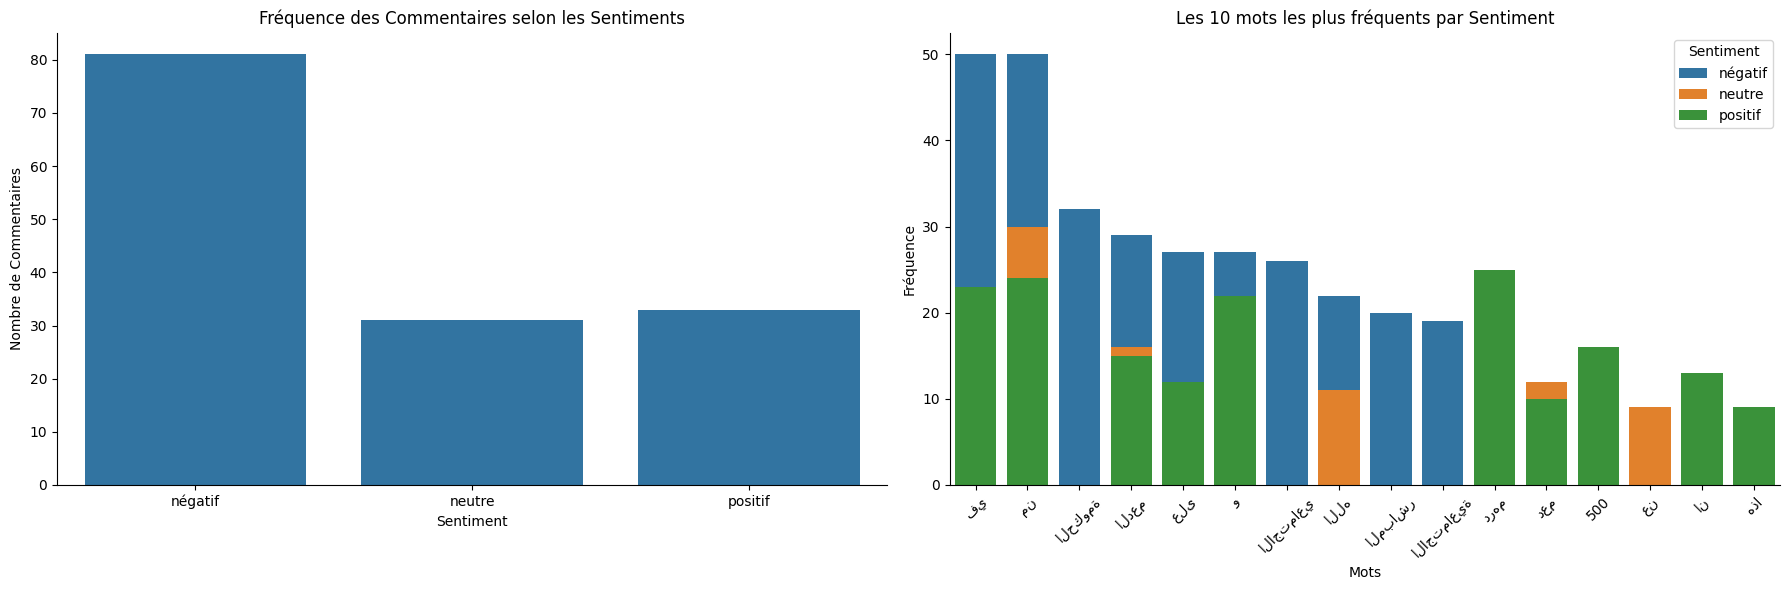

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Défini les plages d'upvotes
bins = [-float('inf'), -10, 10, float('inf')]
labels = ['négatif', 'neutre', 'positif']

# Crée une nouvelle colonne 'sentiment' basée sur les plages d'upvotes
df['sentiment'] = pd.cut(df['upvotes'], bins=bins, labels=labels)

# Compte le nombre de commentaires dans chaque plage de sentiment et les classer selon les indexes
sentiment_counts = df['sentiment'].value_counts().sort_index()

# Crée un graphe montrant la fréquence des commentaires selon les sentiments
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Commentaires')
plt.title('Fréquence des Commentaires selon les Sentiments')
plt.gca().spines[['top', 'right']].set_visible(False) # Cache les bordures supérieures et droites du graphique

# Calcule les mots les plus fréquents selon les sentiments
top_words_per_sentiment = {}
for sentiment in labels:
    # Filtrer les commentaires, Joindre les commentaires et Séparer en une liste de mots individuels
    words = ' '.join(df[df['sentiment'] == sentiment]['preprocessed_comment']).split()
    word_counts = Counter(words)
    top_words_per_sentiment[sentiment] = dict(word_counts.most_common(10))

# Crée un graphe montrant les 10 mots les plus fréquents pour chaque sentiment
plt.subplot(1, 2, 2)
for sentiment, top_words in top_words_per_sentiment.items():
    sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), label=sentiment)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Les 10 mots les plus fréquents par Sentiment')
# Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)
# Pour éviter que les graphiques se chevauchent
plt.tight_layout()
plt.show()

# 4. Entrâınement du modèle

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Télécharger les ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')

# Définir les plages d'upvotes
bins = [-float('inf'), -10, 10, float('inf')]
labels = ['négatif', 'neutre', 'positif']

# Créer une nouvelle colonne 'sentiment' basée sur les plages d'upvotes
df['sentiment'] = pd.cut(df['upvotes'], bins=bins, labels=labels)

# Créer un dictionnaire pour stocker les mots les plus fréquents par sentiment
top_words_per_sentiment = {}

# Calculer les mots les plus fréquents selon les sentiments
for sentiment in labels:
    words = ' '.join(df[df['sentiment'] == sentiment]['filtered_comment']).split()
    word_counts = Counter(words)
    top_words_per_sentiment[sentiment] = [word for word, _ in word_counts.most_common(100)]

# Combinez les mots les plus fréquents de chaque sentiment
top_words = set()
for words in top_words_per_sentiment.values():
    top_words.update(words)

# Créer une nouvelle colonne 'filtered_comment_top' contenant uniquement les mots les plus fréquents par sentiment
df['filtered_comment_top'] = df['filtered_comment'].apply(lambda comment: ' '.join(word for word in word_tokenize(comment) if word in top_words))

# Vectorisation des commentaires en utilisant TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['filtered_comment_top'])  # Utiliser toutes les données

# Entraînement du classificateur Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_tfidf, df['sentiment'])  # Utiliser toutes les étiquettes

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


MultinomialNB()

# 5. Evaluation du modèle :

In [ ]:
# Prédiction sur l'ensemble de données
y_pred = classifier.predict(X_tfidf)

# Évaluation du modèle
accuracy = accuracy_score(df['sentiment'], y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(df['sentiment'], y_pred))

Accuracy: 0.8482758620689655
Classification Report:
               precision    recall  f1-score   support

      neutre       1.00      0.52      0.68        31
     négatif       0.80      0.99      0.88        81
     positif       0.93      0.82      0.87        33

    accuracy                           0.85       145
   macro avg       0.91      0.77      0.81       145
weighted avg       0.87      0.85      0.84       145



# 6. Application du modèle

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Liste des nouveaux commentaires à prédire
new_comments = ["الحكومة ماضية في الاتجاه  ", " 500 اعيش بكرامة", "كفاكم ان تغطو الشمس بالغربالو اعطوا الناس الفقراء "]

# Prétraitement des nouveaux commentaires
preprocessed_new_comments = [preprocess_arabic_text(comment) for comment in new_comments]

# Vectorisation des nouveaux commentaires
X_new_comments_tfidf = tfidf_vectorizer.transform(preprocessed_new_comments)

# Prédiction des upvotes des nouveaux commentaires
new_comments_upvotes = classifier.predict(X_new_comments_tfidf)

# Affichage des prédictions
for comment, upvote in zip(new_comments, new_comments_upvotes):
    print(f"Commentaire : {comment} | Upvotes prédits : {upvote}")


Commentaire : الحكومة ماضية في الاتجاه   | Upvotes prédits : négatif
Commentaire :  500 اعيش بكرامة | Upvotes prédits : positif
Commentaire : كفاكم ان تغطو الشمس بالغربالو اعطوا الناس الفقراء  | Upvotes prédits : neutre
